# A basic multilayer-perceptron

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

> The basic building blocks of deep networks are of the form: Linear layer + Point-wise non-linearity / activation. 
> Keras rolls these two into one, called “Dense.”

* scikit-learn example from nntour: https://github.com/miku/nntour#multi-layer-perceptron-with-scikit-learn

In [4]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

In [5]:
# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

In [7]:
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
)

In [8]:
model

Sequential(
  (0): Linear(in_features=1000, out_features=100)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10)
)

Define a loss function.

In [9]:
loss_fn = torch.nn.MSELoss(size_average=False)

A learning rate for gradient descent.

In [15]:
learning_rate, epochs = 1e-4, 200

In [16]:
# Keep history

In [17]:
history = []

In [18]:
for t in range(epochs):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the loss.
    loss = loss_fn(y_pred, y)
    # print(t, loss.data[0])
    history.append(loss.data[0])
  
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Variable, so
    # we can access its data and gradients like we did before.
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

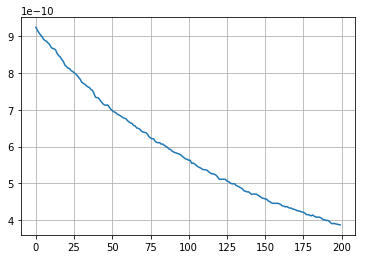

In [19]:
plt.plot(range(epochs), history)
plt.grid(True)